## COVID-19 Twitter Sentiment Analysis

### 4 Additional Packages
* Spacy
    * A package used to perform Natural Language Proccessing on our text. 
    * It is a new package and quite popular. 
    * Very Powerful, but can be slow
    * Can create custom model or use prebuilt ones
* Textblob
    * Very simple but easy sentiment analysis
    * Polarity- -1(negative) to 1 (positive)
    * Subjectivity -1 (subjective) to 1 (factual)
* Wordcloud
    * Makes wordcloud from text file
    * Limited in how it is structured, can be difficult to get data in a text file
* Datetime
    * allows access to datetime object which makes our lives easier



Credit to Christian Jung 

In [ ]:
import pandas as pd
import numpy as np
import datetime

In [ ]:
df = pd.read_csv("covid19_tweets_short.csv", engine='python')
df.shape

(5000, 14)

In [ ]:
df.head()


,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,140735,Romesh Vaitilingam,"Bristol, UK","Economics writer on new findings, policy analy...",2013-03-03 20:14:41,9324,768,1086,False,2020-08-17 08:04:00,#Brexit has happened – but the nature of the U...,['Brexit'],TweetDeck,False
1,83945,Igor Akhmetov,"Russia, Moscow",NaN,2010-04-26 12:19:46,96,333,15,False,2020-08-08 14:02:37,#Covid19 has displaced workforce's around the ...,"['Covid19', 'GlobalThinking']",EveryoneSocial,False
2,47341,Paddy Docherty,London,Historian of empire & anticolonial resistance ...,2009-09-22 18:02:00,7892,781,163510,False,2020-07-31 18:27:39,".@eyejosh UK, this ⬇️ goes for us and our murd...","['COVID19', 'ToryGenocide']",Twitter for iPhone,False
3,79842,TRACY TARTER,NaN,NaN,2014-06-27 02:25:22,78,484,4898,False,2020-08-06 15:15:02,@BrianUFT @NYCCouncil @NYCSchools @UFT This is...,NaN,Twitter for iPhone,False
4,55809,To Shed Light,NaN,#ToShedLight and reveal the truth.,2015-10-23 14:58:47,44,51,432,False,2020-08-01 17:17:53,"260 kids, staffers tested positive for #Covid1...","['Covid19', 'CDC']",Twitter for iPhone,False


In [ ]:
subset = df[['text', 'date']].copy()
subset.head()

,text,date
0,#Brexit has happened – but the nature of the U...,2020-08-17 08:04:00
1,#Covid19 has displaced workforce's around the ...,2020-08-08 14:02:37
2,".@eyejosh UK, this ⬇️ goes for us and our murd...",2020-07-31 18:27:39
3,@BrianUFT @NYCCouncil @NYCSchools @UFT This is...,2020-08-06 15:15:02
4,"260 kids, staffers tested positive for #Covid1...",2020-08-01 17:17:53


In [ ]:
def toDatetime(date):
  return datetime.strptime(date, '%m/%d/%y %X')

subset["date"]= pd.to_datetime(subset.date)

In [ ]:
subset.head()

,text,date
0,#Brexit has happened – but the nature of the U...,2020-08-17 08:04:00
1,#Covid19 has displaced workforce's around the ...,2020-08-08 14:02:37
2,".@eyejosh UK, this ⬇️ goes for us and our murd...",2020-07-31 18:27:39
3,@BrianUFT @NYCCouncil @NYCSchools @UFT This is...,2020-08-06 15:15:02
4,"260 kids, staffers tested positive for #Covid1...",2020-08-01 17:17:53


In [ ]:
subset['month'] =  subset.date.apply(lambda x : x.month)

In [ ]:
subset.head()

,text,date,month
0,#Brexit has happened – but the nature of the U...,2020-08-17 08:04:00,8
1,#Covid19 has displaced workforce's around the ...,2020-08-08 14:02:37,8
2,".@eyejosh UK, this ⬇️ goes for us and our murd...",2020-07-31 18:27:39,7
3,@BrianUFT @NYCCouncil @NYCSchools @UFT This is...,2020-08-06 15:15:02,8
4,"260 kids, staffers tested positive for #Covid1...",2020-08-01 17:17:53,8


In [ ]:
subset["time"]= subset.date.apply(lambda x : x.hour)


In [ ]:
subset.head()

,text,date,month,time
0,#Brexit has happened – but the nature of the U...,2020-08-17 08:04:00,8,8
1,#Covid19 has displaced workforce's around the ...,2020-08-08 14:02:37,8,14
2,".@eyejosh UK, this ⬇️ goes for us and our murd...",2020-07-31 18:27:39,7,18
3,@BrianUFT @NYCCouncil @NYCSchools @UFT This is...,2020-08-06 15:15:02,8,15
4,"260 kids, staffers tested positive for #Covid1...",2020-08-01 17:17:53,8,17


In [ ]:
nbaRestart = datetime.datetime(2020,7,30)
beforeRestart = subset[subset['date'] < nbaRestart].copy()
beforeRestart.head()

,text,date,month,time
10,"Chris Brown and Young Thug NEW Song ""GO CRAZY""...",2020-07-25 00:12:47,7,0
11,Election years are getting harder and harder. ...,2020-07-26 08:38:59,7,8
16,The only chance to control #coronavirus is to ...,2020-07-28 05:34:59,7,5
19,The #Ukraine's President renewed the invitatio...,2020-07-25 12:18:38,7,12
21,Patient &amp; public involvement (PPI) is cent...,2020-07-25 09:35:04,7,9


In [ ]:
afterRestart = subset[subset['date'] >= nbaRestart].copy()
afterRestart.head()

,text,date,month,time
0,#Brexit has happened – but the nature of the U...,2020-08-17 08:04:00,8,8
1,#Covid19 has displaced workforce's around the ...,2020-08-08 14:02:37,8,14
2,".@eyejosh UK, this ⬇️ goes for us and our murd...",2020-07-31 18:27:39,7,18
3,@BrianUFT @NYCCouncil @NYCSchools @UFT This is...,2020-08-06 15:15:02,8,15
4,"260 kids, staffers tested positive for #Covid1...",2020-08-01 17:17:53,8,17


In [ ]:
#!pip install textblob
from textblob import TextBlob

In [ ]:
afterRestart['sentiment'] = subset.text.apply(lambda x : TextBlob(x).sentiment.polarity)

In [ ]:
afterRestart.head()

,text,date,month,time,sentiment
0,#Brexit has happened – but the nature of the U...,2020-08-17 08:04:00,8,8,0.066667
1,#Covid19 has displaced workforce's around the ...,2020-08-08 14:02:37,8,14,0.500000
2,".@eyejosh UK, this ⬇️ goes for us and our murd...",2020-07-31 18:27:39,7,18,0.000000
3,@BrianUFT @NYCCouncil @NYCSchools @UFT This is...,2020-08-06 15:15:02,8,15,-0.700000
4,"260 kids, staffers tested positive for #Covid1...",2020-08-01 17:17:53,8,17,-0.061364


In [ ]:
beforeRestart['sentiment'] = subset.text.apply(lambda x : TextBlob(x).sentiment.polarity)

In [ ]:
beforeRestart.head()

,text,date,month,time,sentiment
10,"Chris Brown and Young Thug NEW Song ""GO CRAZY""...",2020-07-25 00:12:47,7,0,-0.190909
11,Election years are getting harder and harder. ...,2020-07-26 08:38:59,7,8,-0.100000
16,The only chance to control #coronavirus is to ...,2020-07-28 05:34:59,7,5,0.000000
19,The #Ukraine's President renewed the invitatio...,2020-07-25 12:18:38,7,12,0.000000
21,Patient &amp; public involvement (PPI) is cent...,2020-07-25 09:35:04,7,9,0.066667


In [ ]:
print(np.mean(beforeRestart.sentiment),np.mean(afterRestart.sentiment))

0.07375542721724472 0.07389282951796161


In [ ]:
afterRestart["subjectivity"]= subset.text.apply(lambda x : TextBlob(x).sentiment.subjectivity)
beforeRestart["subjectivity"]= subset.text.apply(lambda x : TextBlob(x).sentiment.subjectivity)
print(np.mean(beforeRestart.subjectivity), np.mean(afterRestart.subjectivity))

0.3403972221609798 0.32585589342968235


In [ ]:
#!pip install spacy
#!python -m spacy download en_core_web_sm

In [ ]:
from spacy import displacy

import en_core_web_sm
nlp=en_core_web_sm.load()

In [ ]:
text = "When Kyle Guy sank three straight free-throws to beat Auburn in 2019, Ben celebrated immensely."
#cardinal is a numeral that doesn't fall under another type
nlp=en_core_web_sm.load()
doc = nlp(text)
#displacy.render(doc, style="ent")#jupyter
displacy.render(doc, style='ent', jupyter=True) #collab

In [ ]:
def getPeople(input):
    people=[]
    doc = nlp(input)

    for e in doc.ents:
        ents = [(e.text, e.label_, e.kb_id_)]
        #print(ents)
        if (e.label_ == "PERSON"):
           people.append(e.text)
    
    if len(people) ==0:
        return ""
    else:
        return people[0]

In [ ]:
getPeople(text)
#For simplicity sake of this lesson only carrying about the first person. 

'Kyle Guy'

In [ ]:
dfPeople = beforeRestart.copy()

In [ ]:
dfPeople['people'] = dfPeople.text.apply(lambda x : getPeople(x)) #will be slow because spacy is slow

In [ ]:
dfPeople.head()

,text,date,month,time,sentiment,subjectivity,people
10,"Chris Brown and Young Thug NEW Song ""GO CRAZY""...",2020-07-25 00:12:47,7,0,-0.190909,0.438636,Chris Brown
11,Election years are getting harder and harder. ...,2020-07-26 08:38:59,7,8,-0.100000,0.000000,
16,The only chance to control #coronavirus is to ...,2020-07-28 05:34:59,7,5,0.000000,1.000000,
19,The #Ukraine's President renewed the invitatio...,2020-07-25 12:18:38,7,12,0.000000,0.000000,Abdel Fattah al-Sisi
21,Patient &amp; public involvement (PPI) is cent...,2020-07-25 09:35:04,7,9,0.066667,0.305556,


In [ ]:
dfPeople = dfPeople[(dfPeople.people) != ""]

dfPeople.head()

,text,date,month,time,sentiment,subjectivity,people
10,"Chris Brown and Young Thug NEW Song ""GO CRAZY""...",2020-07-25 00:12:47,7,0,-0.190909,0.438636,Chris Brown
19,The #Ukraine's President renewed the invitatio...,2020-07-25 12:18:38,7,12,0.000000,0.000000,Abdel Fattah al-Sisi
31,Vijay Shalby Saves The Life Of A Corona Positi...,2020-07-25 06:13:31,7,6,0.227273,0.545455,Vijay Shalby
40,"To our frontline workers, we at the OPPP would...",2020-07-29 16:10:53,7,16,0.000000,0.000000,https://t.co/v2f0hLkKn5
48,When in #Rome...pass The First Day after #Self...,2020-07-25 06:41:22,7,6,0.250000,0.333333,Rome


In [ ]:
dfPeople.people.value_counts()

COVID19              10
Trump                 7
Coronavirus           5
Odisha                4
IndiaFightsCorona     4
                     ..
Robert O'Brien        1
SSRajamouli           1
Covidiots             1
Dear @OHAOregon       1
GDPR                  1
Name: people, Length: 309, dtype: int64

In [ ]:
dfDonald = dfPeople[(dfPeople.people).str.contains("Trump")]

In [ ]:
dfDonald.head()

,text,date,month,time,sentiment,subjectivity,people
462,NOW #Trump is all for wearing a mask and the k...,2020-07-25 02:14:26,7,2,0.0000,0.000,Trump
1034,A normal day in #TrumpsAmerica #COVID19 #Coro...,2020-07-27 05:18:35,7,5,0.1500,0.650,TrumpsAmerica
1402,What message is the #TrumpAdministration telli...,2020-07-26 07:42:09,7,7,0.0000,0.000,TrumpAdministration
1435,@BillStepien @realDonaldTrump HELL NO! I'm sup...,2020-07-27 04:51:55,7,4,-0.0625,0.175,Trump
2159,#COVID19 #ScienceMatters thousands Ill from #T...,2020-07-26 02:56:48,7,2,-0.5000,1.000,TrumpVirus


In [ ]:
dfDonald=  dfDonald[~(dfDonald.people).str.contains("jr")] #dropping Don Jr

In [ ]:
np.mean(dfDonald.sentiment)

0.014583333333333337

In [ ]:
dfCovid = dfPeople[(dfPeople.people) == ("COVID19" or "Coronavirus")]

In [ ]:
np.mean(dfCovid.sentiment)

0.016991792929292933

# Let's make a word cloud!
Word cloud is made from a text file and we want a word cloud to have bigger text when it is more positive. 

Add 2 so sentiment positive and multiply by 11 a prime number so we have more unique numbers

In [ ]:
dfPeople["scaledSent"]= dfPeople.sentiment.apply(lambda x : np.floor ((x +2)*11))

In [ ]:
dfPeople.head()

,text,date,month,time,sentiment,subjectivity,people,scaledSent
10,"Chris Brown and Young Thug NEW Song ""GO CRAZY""...",2020-07-25 00:12:47,7,0,-0.190909,0.438636,Chris Brown,19.0
19,The #Ukraine's President renewed the invitatio...,2020-07-25 12:18:38,7,12,0.000000,0.000000,Abdel Fattah al-Sisi,22.0
31,Vijay Shalby Saves The Life Of A Corona Positi...,2020-07-25 06:13:31,7,6,0.227273,0.545455,Vijay Shalby,24.0
40,"To our frontline workers, we at the OPPP would...",2020-07-29 16:10:53,7,16,0.000000,0.000000,https://t.co/v2f0hLkKn5,22.0
48,When in #Rome...pass The First Day after #Self...,2020-07-25 06:41:22,7,6,0.250000,0.333333,Rome,24.0


In [ ]:
def addToText(people,scaled ):
    f= open("wordcloud.txt","a")
    f.write((people + " ")* int(scaled)  )
    f.close()

In [ ]:
result = [addToText(x, y) for x, y in zip(dfPeople.people,dfPeople.scaledSent )]

In [ ]:
dfPeople.head()

,text,date,month,time,sentiment,subjectivity,people,scaledSent
10,"Chris Brown and Young Thug NEW Song ""GO CRAZY""...",2020-07-25 00:12:47,7,0,-0.190909,0.438636,Chris Brown,19.0
19,The #Ukraine's President renewed the invitatio...,2020-07-25 12:18:38,7,12,0.000000,0.000000,Abdel Fattah al-Sisi,22.0
31,Vijay Shalby Saves The Life Of A Corona Positi...,2020-07-25 06:13:31,7,6,0.227273,0.545455,Vijay Shalby,24.0
40,"To our frontline workers, we at the OPPP would...",2020-07-29 16:10:53,7,16,0.000000,0.000000,https://t.co/v2f0hLkKn5,22.0
48,When in #Rome...pass The First Day after #Self...,2020-07-25 06:41:22,7,6,0.250000,0.333333,Rome,24.0


In [ ]:
from google.colab import files
#https://www.vectorstock.com/royalty-free-vector/coronavirus-silhouette-vector-30257356
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving covidmask2.png to covidmask2.png
User uploaded file "covidmask2.png" with length 22990 bytes


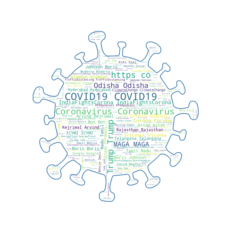

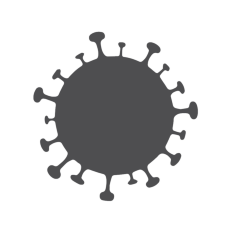

In [ ]:
#modified code from wordcloud documentation
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, 'wordcloud.txt')).read()

# read the mask image
# taken from 
# https://www.vectorstock.com/royalty-free-vector/coronavirus-silhouette-vector-30257356
covid_mask = np.array(Image.open(path.join(d, "covidmask2.png"))) #place file name here
#stopwords = set(STOPWORDS)
#stopwords.add("said")


wc = WordCloud(background_color="white", max_words=2000, mask=covid_mask,
               contour_width=3, contour_color='steelblue')

#If you wanted to move stopwords, you can uncomment the lines before wc, 
    #the following line should be an added parameter
#stopwords=stopwords, 


# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "CovidFinal.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(covid_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

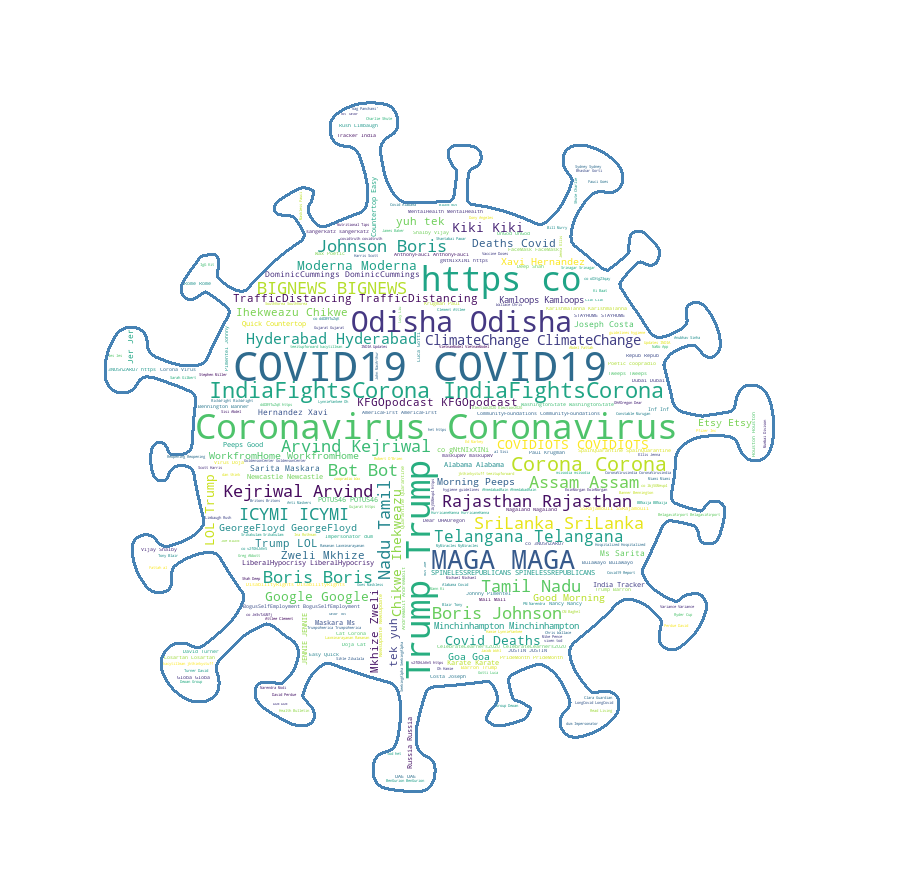

In [ ]:
from IPython.display import Image
Image(filename='CovidFinal.png') 